# Capstone Analytic Report #

## The Dataset and Background: ##

For this report, I've chosen to go with the very well known Titanic dataset. Specifically, I will be using the “titanic” dataset that comes with the seaborn library for Python.  For those who may be unfamiliar, I will provide a bit of background.

The RMS Titanic was a passenger liner that sunk in the Atlantic Ocean in the early morning hours of April 15, 1912. It was the largest ship in the world at that time, and was claimed to be unsinkable. Tragically, the ship sank on its maiden voyage after a collision with an iceberg. There were only enough lifeboats for approximately 1,200 people; about half the number on board. It's estimated that just over 700 survivors were rescued. Reportedly, a disproportionate number of men perished, as the "women and children" protocol for loading lifeboats was enforced, meaning women and children had priority over the men. In fact, Fifth Officer Harold Lowe notably forced at least one man from a lifeboat at gunpoint, imploring the passenger to "be a man - we have women and children to save'. [Sources: Wikipedia, https://en.wikipedia.org/wiki/RMS_Titanic, https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic]

Many of the datasets I looked at before settling on this one were interesting, but weren't quite as robust. In other words, many datasets provided mostly categorical or numerical variables. In this dataset, there is a good mix of both, which provides an opportunity for a more interesting analysis. In this particular analysis, I would like to learn the following:

1. How did men, women and children fare, respectively, with regard to survival?

2. Which embarkation point had the most survivors?

3. Did the fare paid for a ticket have any effect on the survivability of the passengers, i.e., was someone who purchased a more expensive ticket more likely to survive? 

We will begin by loading in the appropriate libraries to begin exploring and analyzing our data. 


## Initial Exploratory Data Analysis (EDA) ##

In [1]:
# Import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset, which is included in the seaborn library. Similarly, we could load the dataset in to pandas
# via the 'pd.read_csv()' function, assuming the flatfile was in csv format.  

df = sns.load_dataset('titanic')

In [3]:
# Let's get summary info about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
# We can see the number of non-null values above, but how many missing values do we have exactly? 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We need to do something about the missing values in the columns we'd like to use. We see above that we are missing data in the "ages" column, which will be a primary source in answering the aforementioned questions. 

In [5]:
# Here, we fill the blank ages with the median value for all the ages. There are more elegant ways to 
# solve this, such as filling in age by sex or designation as 'man', 'woman', or 'child' but we will
# keep it simple for now.

df.age.fillna(df.age.median(), inplace=True)

# Check to see that there are no null values remaining in the age column
df.age.isnull().sum()

0

## Question 1: How did men, women and children fare respectively with regard to survival?##

As mentioned in the introduction to this analysis, at the time the Titanic sank, there was a "women and children first" protocol enforced when loading the lifeboats. Did this actually affect the number of survivors based on sex? Let's first get a feel for the people included in our dataset. 

In [6]:
# How many men, women, and children are included in our dataset? 

df.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

Average Ages:  who
child     6.369518
man      31.978585
woman    31.217712
Name: age, dtype: float64


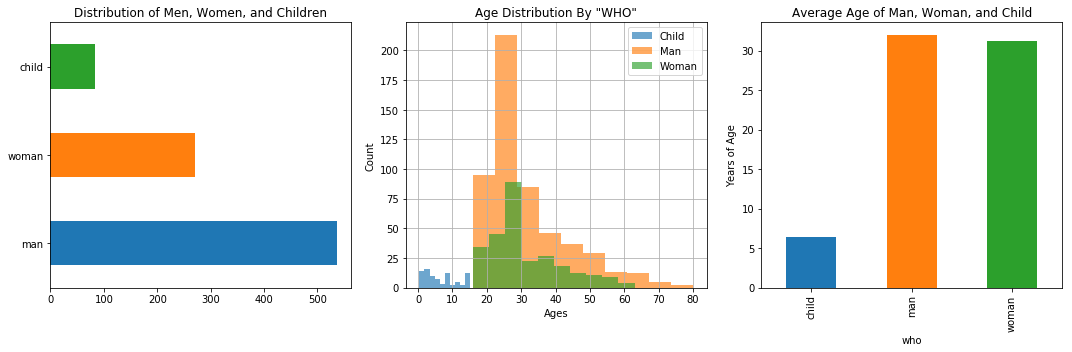

In [15]:
plt.figure(figsize=(15,5))

#create a horizontal chart of men, women, and children in the dataset
plt.subplot(1,3,1)
df.who.value_counts().plot.barh()
plt.title("Distribution of Men, Women, and Children")

#age distribution by man, woman, child
plt.subplot(1,3,2)
df.groupby('who').age.hist(alpha=0.65)
plt.title('Age Distribution By "WHO"')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.legend(['Child','Man','Woman'])

plt.subplot(1,3,3)
df.age.groupby(by=df['who']).mean().plot.bar()
plt.title('Average Age of Man, Woman, and Child')
plt.ylabel('Years of Age')
print("Average Ages: ",df.age.groupby(by=df['who']).mean())

plt.tight_layout()

plt.show()

From the previous charts, we can see that in this dataset, men make up the majority of people aboard. We can also see the the average age for men and women is about thirty-two (32) and thirty-one (31) years of age, respectively. The average age of children  in this dataset is about six years old. Considering the aforementioned "women and children first" protocol, we would expect that a higher number of men perished. Being that the number of men is greater than that of women and children, it would be appropriate to also include the percentage, as well as the absolute number, of survivors.

Survival Percentage:
Children: 59.04%
Women: 75.65%
Men: 16.39%


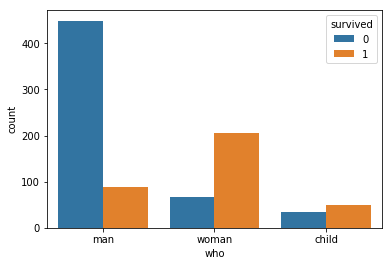

In [8]:
# set our conditions, or filters, to be used to get specific data
surv = df['survived'] == 1
child = df['who'] == 'child'
woman = df['who'] == 'woman'
man = df['who'] == 'man'

sns.countplot(x='who', data=df, hue='survived')

# include the percentages of survivors by man, woman, or child
print('Survival Percentage:')
print("Children: {:.2%}".format(df['survived'][child & surv].count() / df['survived'][child].count()))
print("Women: {:.2%}".format(df['survived'][woman & surv].count() / df['survived'][woman].count()))
print("Men: {:.2%}".format(df['survived'][man & surv].count() / df['survived'][man].count()))

## Question 1 Findings: ##

Men in our dataset were much less likely to survive the incident, with a survival rate of about sixteen (16) percent. Children in this dataset had a fifty-nine (59) percent survival rate, and women had the highest rate of survival at almost seventy-six (76) percent. 

## Question 2: Which embarkation point had the most survivors? ##

In this dataset, we can see that there are three embarkation points: "Q", "C", and "S". These correspond to Cherbourg, France, Queensland, Ireland, and Southampton, England. For this question, we can simply segregate the passengers by their embarkation point, and see if they survived or not. 

S: 33.70%
C: 55.36%
Q: 38.96%


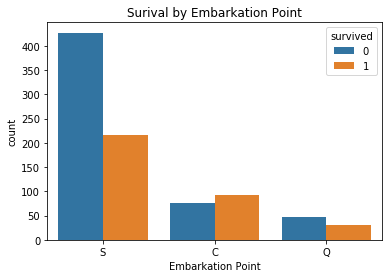

In [9]:
# set our conditions to isolate embarkation point
s = df['embarked'] == 'S'
c = df['embarked'] == 'C'
q = df['embarked'] == 'Q'


sns.countplot(x='embarked', hue='survived', data=df)
plt.title('Surival by Embarkation Point')
plt.xlabel('Embarkation Point')

# include the percentages of survivors by embarkation point
print("S: {:.2%}".format(df['embarked'][s & surv].count()/df['embarked'][s].count()))
print("C: {:.2%}".format(df['embarked'][c & surv].count()/df['embarked'][c].count()))
print("Q: {:.2%}".format(df['embarked'][q & surv].count()/df['embarked'][q].count()))

## Question 2 Findings: ##

Southampton had the most passengers overall, and suffered the most casualties. The best survivability was had by passengers from Cherbourg at fifty-five (55) percent. It is notable that Queensland suffered a thirty-nine (39) percent survival rate, even though they had much fewer passengers overall. Could it be that passenger class played a role? Even though this question wasn't initially asked, I think it deserves a quick look. 

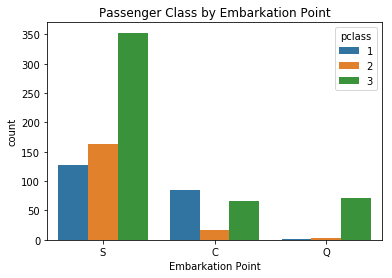

In [10]:
# create a plot that shows the number of passenger class by embarkation point.
sns.countplot(x='embarked', hue='pclass', data=df)
plt.title('Passenger Class by Embarkation Point')
plt.xlabel('Embarkation Point')

plt.show()

Here we can see that Queensland was composed almost entirely third class passengers. It makes a compelling case for, and is a good segue, into our final question.

## Question 3: Did the fare paid for a ticket have any effect on the survivability of the passengers, i.e., was someone who purchased a more expensive ticket more likely to survive? ##

Here, we will dig in to this dataset to determine if there a link between the price paid for a ticket, and the survivability  of the passenger.

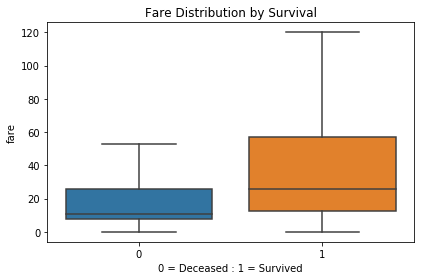

In [11]:
# create plot showing survival by fare

sns.boxplot(x='survived', y='fare', data=df, showfliers=False)
plt.xlabel('0 = Deceased : 1 = Survived')
plt.title('Fare Distribution by Survival')
plt.tight_layout()

plt.show()

(-1.5, 1.5)

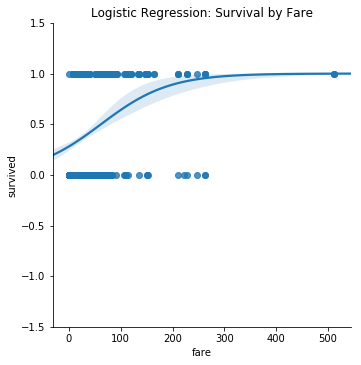

In [14]:
# regression
sns.lmplot(x='fare', y='survived', data=df, logistic=True)
plt.title('Logistic Regression: Survival by Fare')
plt.ylim([-1.5,1.5])


In [13]:
# create a table showing ticket price descriptive stats by survival
df.groupby('survived').fare.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


## Question 3 Findings: ##

We can see from the plots and the extracted/aggregated data, that passengers who survived had a higher ticket price on average. Additionally our logistic regression shows a tendency toward survival with higher ticket prices. Logistic regression was a more appropriate choice in this instance as our dependent variable, whether or not a person survived, is a binary outcome. We can clearly see that among survivors, the average ticket price paid was a bit more than double what the non-survivors paid. 

## Summary and Final Thoughts ##

In this exercise, we have shown that men had the highest likelihood of not surviving the sinking. Additionally, we have learned that passengers from Southampton suffered the highest mortality rate, and that fare paid does indeed seem to be related to passenger survival.



## Sources:##

Sources: Wikipedia: https://en.wikipedia.org/wiki/RMS_Titanic; 
                    https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic
